<a href="https://colab.research.google.com/github/rohang1411/Rock-Paper-Scissors-CNN-Model/blob/master/RPSmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rock Paper Scissors Model

In [ ]:
pip install tensorflow tensorflow-datasets

Libraries

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

import tensorflow as tf
import tensorflow_datasets as tfds


from tensorflow import keras

In [14]:
tf.__version__

'2.3.0'

In [ ]:
tfds.list_builders()   #List of all the datasets in Tensorflow

In [15]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

# info --->  Shows the inforamation about the selected dataset

##INFO ABOUT LABELS/CLASSES 
rock = 0
paper = 1
scissors = 2

In [ ]:
#Checking the Classes and their representation in the dataset

# info.features['label'].num_classes
# info.features['label'].names
# info.features['label'].str2int('rock')


##Preparing Data

In [16]:
ds_test = tfds.load(name = 'rock_paper_scissors', split = 'test')
ds_train = tfds.load(name = 'rock_paper_scissors', split = 'train')

Examples of Data

In [ ]:
fig = tfds.show_examples(info, ds_train)

Converting to Numpy Array

In [17]:
train_images = np.array([i['image'].numpy() [:,:,0] for i in ds_train])          #[:,:,0] this changes to grayscale
train_labels = np.array([i['label'].numpy() for i in ds_train])

test_images = np.array([i['image'].numpy() [:,:,0] for i in ds_test])
test_labels = np.array([i['label'].numpy() for i in ds_test])

categories = ['rock', 'paper', 'scissors']

Just checking shape of data 

In [ ]:
# type(train_images[0])
train_images.shape
# train_labels.shape

# test_images.shape 
# test_labels.shape 

(2520, 300, 300)

Resizing and Normalising Data

In [18]:
train_images = train_images.reshape(2520,300,300,1) #here the last 1 is to use only grayscale images
test_images = test_images.reshape(372,300,300,1) #only 1 color channel
test_images.shape

# train_images.dtype
# test_images.dtype
                                                    # Normalising DATA
train_images = train_images.astype('float32') #just coverting data to float values
test_images = test_images.astype('float32') 


train_images /= 255                         # because we need values between 0 and 1
test_images /= 255                          # which are currently between 0 - 255


In [ ]:
# plt.imshow(train_images[0], cmap = 'gray')
# train_images[0].shape

##Training a network without CNN

In [ ]:
# model = keras.Sequential([
#                           keras.layers.Flatten(),
#                           keras.layers.Dense(512, activation='relu'),
#                           keras.layers.Dense(256, activation='relu'),
#                           keras.layers.Dense(3, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss=keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

# model.fit(train_images, train_labels, epochs=5, batch_size=32)


In [ ]:
# model.evaluate(test_images, test_labels)

##Training a network with CNN

Since we have less amount of training data we can simulate more amount of data by using DROPOUT method, what it does is when we write dropout, it will break some connection in the networks which will simulate more amount of samples. It will generalise 

Here i've used dropout rate = 0.5, it will drop 50% of the connections
It didn't do much here so i also added another dense layer with 128 nodes just before the final layer

In [19]:

model = keras.Sequential([
                          keras.layers.AveragePooling2D(6, 3),                                    #now the size becomes                                                                        
                          keras.layers.Conv2D(512, 6, activation='relu', input_shape=(50,50,1)),  #100X100 bcoz we're moving
                          # keras.layers.AveragePooling2D(6, 3),                                  #3 blocks a time STRIDE = 3
                          keras.layers.Conv2D(256, 6, activation='relu'),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(64, 3, activation='relu'),
                          keras.layers.Conv2D(32, 3, activation='relu'),
                          keras.layers.MaxPool2D(2, 2),
                          keras.layers.Dropout(0.5),                                              #Here 50%networks will be broken
                          keras.layers.Flatten(),
                          # keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
 2/79 [..............................] - ETA: 27s - loss: 3.6262 - accuracy: 0.2812WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1233s vs `on_train_batch_end` time: 0.5997s). Check your callbacks.


79/79 [==============================] - 58s 737ms/step - loss: 0.9794 - accuracy: 0.5325
Epoch 2/5
79/79 [==============================] - 60s 762ms/step - loss: 0.2039 - accuracy: 0.9369
Epoch 3/5
79/79 [==============================] - 60s 753ms/step - loss: 0.0472 - accuracy: 0.9869
Epoch 4/5
79/79 [==============================] - 60s 761ms/step - loss: 0.0325 - accuracy: 0.9877
Epoch 5/5
79/79 [==============================] - 60s 760ms/step - loss: 0.0206 - accuracy: 0.9944


In [20]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 2s 197ms/step - loss: 0.9143 - accuracy: 0.7823


[0.9142549633979797, 0.7822580933570862]

In [ ]:
model.summary()

##SAVING THE MODEL

In [21]:
# model_save_name = 'RPSmodel.h5'
# path = F"/content/gdrive/MLmodels/{model_save_name}" 
!mkdir -p MLmodels
model.save('MLmodels/RPS_model.h5')

from google.colab import files
files.download("MLmodels/RPS_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls MLmodels

In [23]:
savedmodel = tf.keras.models.load_model("MLmodels/RPS_model.h5")
savedmodel.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 118ms/step - loss: 0.9143 - accuracy: 0.3522


[0.9142549633979797, 0.3521505296230316]

##EXAMPLES

Predicting on my single images

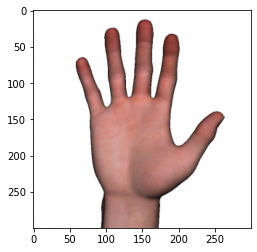

In [24]:
import imageio

img = imageio.imread('https://d2hc5688vzlpnd.cloudfront.net/wp-content/uploads/2017/06/image24-1-300x300.png')
plt.imshow(img)
# imgnp = np.asarray(img)



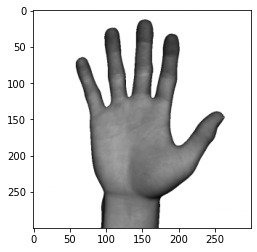

In [25]:
# gray = cv.imread("img",0)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow(gray)
plt.imshow(gray, cmap='gray')

In [26]:
imgnp = np.asarray(gray)
imgnp.shape

(300, 300)

In [27]:
imgnp = imgnp / 255

imgnp = imgnp.reshape(1,300,300,1)
# imgnp

In [ ]:
# model.predict(imgnp)
# np.argmax(model.predict(imgnp))
# model.predict_classes(imgnp)

In [32]:
categories[np.argmax(model.predict(imgnp))]

'paper'

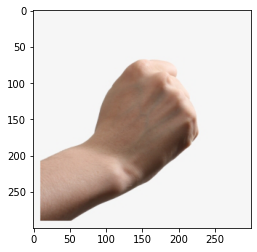

In [33]:
img2 = imageio.imread('https://s.pngkit.com/png/small/2-25620_rock-paper-scissors-rock-paper-scissors-rock.png')
plt.imshow(img2)

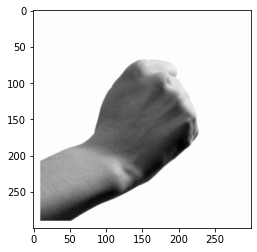

In [34]:
# gray = cv.imread("img",0)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
# cv.imshow(gray)
plt.imshow(gray2, cmap='gray')

In [35]:
imgnp2 = np.asarray(gray2)
imgnp2.shape

(300, 300)

In [36]:
imgnp2 = imgnp2 / 255
imgnp2 = imgnp2.reshape(1,300,300,1)

In [37]:
imgnp2.shape

(1, 300, 300, 1)

In [ ]:
# model.predict_classes(imgnp2)
# np.argmax(model.predict(imgnp2))
# model.predict(imgnp2)

In [42]:
categories[np.argmax(model.predict(imgnp2))]

'rock'

MY IMAGES

EXAMPLE 1

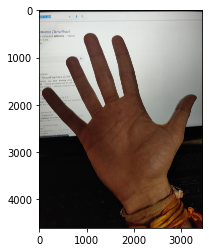

In [43]:
img3 = imageio.imread('/content/MLmodels/MYDATA/IMG_20200805_041440.jpg')
plt.imshow(img3)

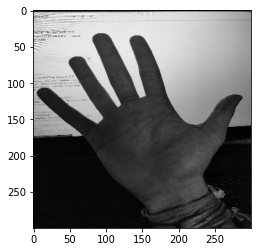

In [44]:
gray3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
resizedgray3 = cv.resize(gray3, (300,300))
plt.imshow(resizedgray3, cmap='gray')

In [45]:
imgnp3 = np.asarray(resizedgray3)
imgnp3.shape

(300, 300)

In [46]:
imgnp3.shape

(300, 300)

In [48]:
imgnp3 = imgnp3 / 255
imgnp3 = imgnp3.reshape(1,300,300,1)

In [ ]:
# model.predict_classes(imgnp3)
# np.argmax(model.predict(imgnp3))

In [51]:
categories[np.argmax(model.predict(imgnp3))]

'paper'

EXAMPLE 1

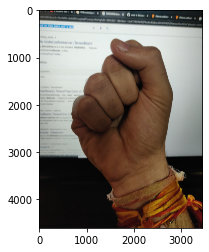

In [52]:
img4 = imageio.imread('/content/MLmodels/MYDATA/IMG_20200805_041456.jpg')
plt.imshow(img4)

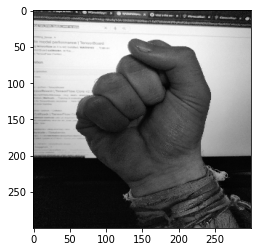

In [53]:
gray4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)
resizedgray4 = cv.resize(gray4, (300,300))
plt.imshow(resizedgray4, cmap='gray')

In [54]:
imgnp4 = np.asarray(resizedgray4)
imgnp4.shape

(300, 300)

In [55]:
imgnp4 = imgnp4 / 255
imgnp4 = imgnp4.reshape(1,300,300,1)

In [ ]:
# model.predict_classes(imgnp4)
# np.argmax(model.predict(imgnp4))

In [58]:
categories[np.argmax(model.predict(imgnp4))]

'rock'

EXAMPLE 3

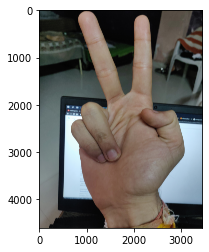

In [59]:
img5 = imageio.imread('/content/MLmodels/MYDATA/IMG_20200805_041515.jpg')
plt.imshow(img5)

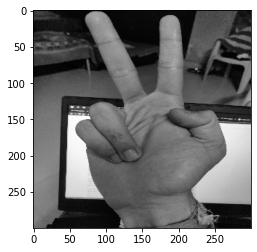

In [60]:
gray5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)
resizedgray5 = cv.resize(gray5, (300,300))
plt.imshow(resizedgray5, cmap='gray')

In [61]:
imgnp5 = np.asarray(resizedgray5)
imgnp5.shape

(300, 300)

In [62]:
imgnp5 = imgnp5 / 255
imgnp5 = imgnp5.reshape(1,300,300,1)

In [ ]:
# model.predict_classes(imgnp5)
# np.argmax(model.predict(imgnp5))

In [65]:
categories[np.argmax(model.predict(imgnp5))]

'rock'

#PREDICTING LIVE

In [66]:
from google.colab.patches import cv2_imshow

In [ ]:
capture = cv.VideoCapture(1)

while(True):

  ret, frame = capture.read()
  
#   frame1 = frame.copy()
#   gray_img = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
#   grayframe = cv.resize(gray_img,(300,300), interpolation = cv.INTER_CUBIC)
  if ret == True:
      cv_imshow('live feed', frame)
      b = cv.resize(frame,(300,300), interpolation = cv.INTER_CUBIC)
        
  grayframe = cv.cvtColor(b, cv.COLOR_BGR2GRAY)
  grayframe = grayframe / 255

  grayframe = grayframe.reshape(1,300,300,1)
  print(categories[np.argmax(model.predict(grayframe))])


  if cv.waitKey(1) & 0xFF == ord('q'):
        break

capture.release()

In [ ]:
cap=cv2.VideoCapture(0)

#Hyperparameter Tuning